In [25]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [27]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [28]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

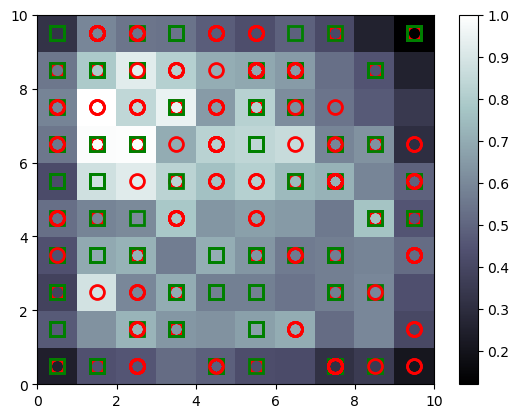

In [29]:
# Visualising the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [35]:
# Finding the Frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5768295e+07 1.0000000e+00 2.5580000e+01 3.3500000e-01 2.0000000e+00
  4.0000000e+00 8.0000000e+00 3.5000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 3.4000000e+02 1.0000000e+00]
 [1.5701885e+07 1.0000000e+00 1.7250000e+01 3.0000000e+00 2.0000000e+00
  4.0000000e+00 4.0000000e+00 4.0000000e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.6000000e+02 4.1000000e+01]
 [1.5753550e+07 1.0000000e+00 3.5580000e+01 7.5000000e-01 2.0000000e+00
  4.0000000e+00 4.0000000e+00 1.5000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 2.3100000e+02 1.0000000e+00]
 [1.5747757e+07 1.0000000e+00 3.5000000e+01 3.3750000e+00 2.0000000e+00
  8.0000000e+00 8.0000000e+00 8.2900000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5724851e+07 1.0000000e+00 3.5000000e+01 2.5000000e+00 2.0000000e+00
  3.0000000e+00 4.0000000e+00 1.0000000e+00 0.0000000e+00 0.

In [37]:
# Printing the Fraudulent Clients
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15768295
15701885
15753550
15747757
15724851
15810485
15702149
15787229
15759133
15763194
15713160
15790113
15686913
15758477
15796413
15673238
15790689
15765257
15764226
15767231
15761047
15771409


In [39]:
# Going from Unsupervised to Supervised Deep Learning
# Creating the Matrix of features
customers = dataset.iloc[:, 1:].values

In [41]:
# Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

In [43]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [45]:
# Importing the libraries
import tensorflow as tf

In [46]:
# Buidling the ANN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
# Training the ANN
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7525 - loss: 0.5882
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9581 - loss: 0.2907
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9743 - loss: 0.1960
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9600 - loss: 0.1783
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9690 - loss: 0.1340
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9697 - loss: 0.1249
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9677 - loss: 0.1092
Epoch 8/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9714 - loss: 0.0991
Epoch 9/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9686 - loss: 0.0985
Epoch 10/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9739 - loss: 0.0827


In [48]:
# Predicting the Test set results
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [49]:
print(y_pred)

[[1.55775150e+07 1.42347790e-05]
 [1.56999630e+07 2.64322971e-05]
 [1.57016870e+07 2.82359069e-05]
 ...
 [1.57964130e+07 1.81236684e-01]
 [1.56732380e+07 1.81236684e-01]
 [1.57631940e+07 1.81236684e-01]]
